In [1]:
import pandas as pd
import numpy as np
from scipy import integrate
import random

from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'monospace'
%matplotlib widget

<center><b><h1>Overview</h1></b></center>

$$
\text{Computing Percent Transmittance Given Absorbance Values}
$$

$$
\begin{aligned}
A = \log_{10}\left(\frac{I_o}{I}\right) \;\text{or}\; 10^A = \left(\frac{I_o}{I}\right)
\end{aligned}
$$


$$
\begin{aligned}
\left(10^A\right)^{-1} = \left(\frac{I_o}{I}\right)^{-1}
\end{aligned}
$$

$$
\begin{aligned}
10^{-A} = \left(\frac{I}{I_o}\right)
\end{aligned}
$$

$$
\begin{aligned}
\mathbf{\%T = 10^{-A} \cdot 100\%}
\end{aligned}
$$

In [2]:
#Loading Data
raw_csv_data = pd.read_csv('spectra/sample_input.csv', names=['wave_num', 'abs'])

abs_data = pd.DataFrame({'wave_num' : raw_csv_data['wave_num'],
                         'abs' : raw_csv_data['abs']})

trans_data = pd.DataFrame({'wave_num': raw_csv_data['wave_num'],
                           'trans': ((10**(-raw_csv_data['abs']))*100)}) #implementation of formula above

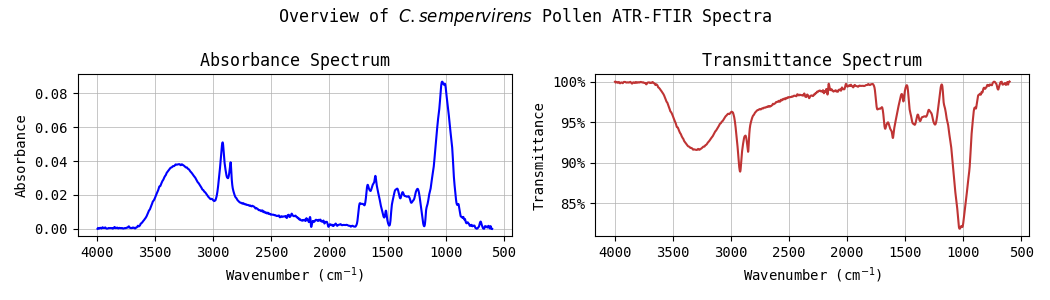

In [3]:
fig1, (abs_plot, trans_plot) = plt.subplots(1,2, figsize=(10.5,3))
fig1.canvas.header_visible = False
fig1.suptitle('Overview of $\mathit{C. sempervirens}$ Pollen ATR-FTIR Spectra')

#Absorbance Plot
abs_plot.plot(abs_data['wave_num'], abs_data['abs'],
             color='blue')
abs_plot.invert_xaxis()
abs_plot.grid(linewidth=0.5)


#title and labels
abs_plot.set(title='Absorbance Spectrum',
             xlabel='Wavenumber (cm$^{-1}$)',
             ylabel='Absorbance')

#Transmittance Plot
trans_plot.plot(trans_data['wave_num'], trans_data['trans'],
               color='#bf3434')
trans_plot.invert_xaxis()
trans_plot.grid(linewidth=0.5)

#title and labels
trans_yticks = [i for i in range(85,105,5)]
trans_plot.set(title='Transmittance Spectrum',
               xlabel='Wavenumber (cm$^{-1}$)',
               ylabel='Transmittance',
               yticks=trans_yticks,
               yticklabels=[f'{i}%' for i in trans_yticks])

fig1.tight_layout()

<center><b><h1>Molecular Features of the Spectrum</h1></b></center>
<center><a href="https://vm36.upi.edu/index.php/ijost/article/download/15806/pdf">Nandiyanto et al., (2019)</a><center>

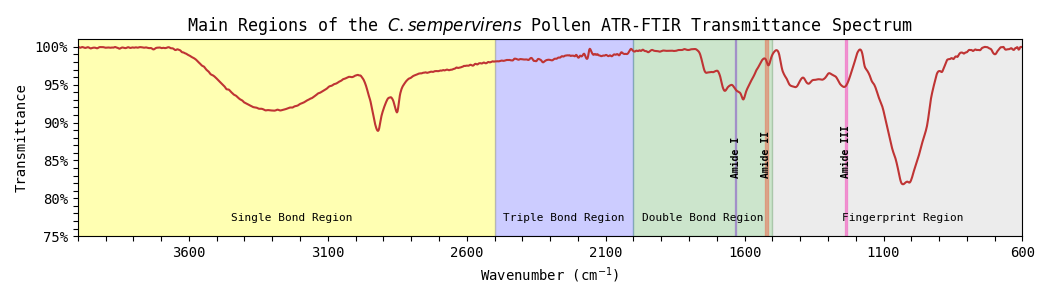

In [19]:
#Visualizing Main and Amide (I,II,III) Regions

fig2, trans_func_plot = plt.subplots(1,1, figsize=(10.5, 3))
fig2.canvas.header_visible = False

#main plot
trans_func_plot.plot(trans_data['wave_num'], trans_data['trans'],
                    color = '#bf3434')

#single bond region
trans_func_plot.axvspan(2500, 4000, color='yellow', alpha=0.3)
trans_func_plot.text(3450, 77, 'Single Bond Region',fontsize=8)

#triple bond region
trans_func_plot.axvspan(2000, 2500, color='blue', alpha=0.2)
trans_func_plot.text(2470, 77, 'Triple Bond Region',fontsize=8)

#double bond region
trans_func_plot.axvspan(1500, 2000, color='green', alpha=0.2)
trans_func_plot.text(1970, 77, 'Double Bond Region',fontsize=8)

#fingerprint region
trans_func_plot.axvspan(600, 1500, color='grey', alpha=0.15)
trans_func_plot.text(1250, 77, 'Fingerprint Region',fontsize=8)


# #amide 1
trans_func_plot.axvspan(1630, 1635, color='#6817c5', alpha=0.3)
trans_func_plot.text(1650, 83, 'Amide I', rotation=90, fontsize=7, fontweight='bold')

#amide 2
trans_func_plot.axvspan(1517, 1526, color='#e76f51', alpha=0.5)
trans_func_plot.text(1541, 83, 'Amide II', rotation=90, fontsize=7, fontweight='bold')

#amide 3
trans_func_plot.axvspan(1230, 1238, color='#f800a4', alpha=0.3)
trans_func_plot.text(1253, 83, 'Amide III', rotation=90, fontsize=7, fontweight='bold')


#labels
trans_func_xticks = [tick for tick in range(600,4100,100)]
trans_func_yticks = [tick for tick in range (75,101,1)]

trans_func_plot.set(title='Main Regions of the $\mathit{C. sempervirens}$ Pollen ATR-FTIR Transmittance Spectrum',
                    xlabel='Wavenumber (cm$^{-1}$)',
                    ylabel='Transmittance',
                    xticks=trans_func_xticks,
                    xticklabels=[tick if tick in range(600,4500,500) else '' for tick in trans_func_xticks],
                    yticks=trans_func_yticks,
                    yticklabels=[f'{tick}%' if tick in range(75,105,5) else '' for tick in trans_func_yticks],
                    ylim=(75,101),
                    xlim=(600,4000))

trans_func_plot.invert_xaxis()
fig2.tight_layout()

<center><b><h1>Spectrum Optimization</h1></b></center>

In [5]:
#Loading Data
scan_16 = pd.read_csv('spectra/16_scans.csv')
scan_24 = pd.read_csv('spectra/24_scans.csv')
scan_32 = pd.read_csv('spectra/32_scans.csv')
scan_48 = pd.read_csv('spectra/48_scans.csv')
scan_64 = pd.read_csv('spectra/64_scans.csv')
scan_72 = pd.read_csv('spectra/72_scans.csv')

<center><b><h2>General Comparison</h2></b></center>

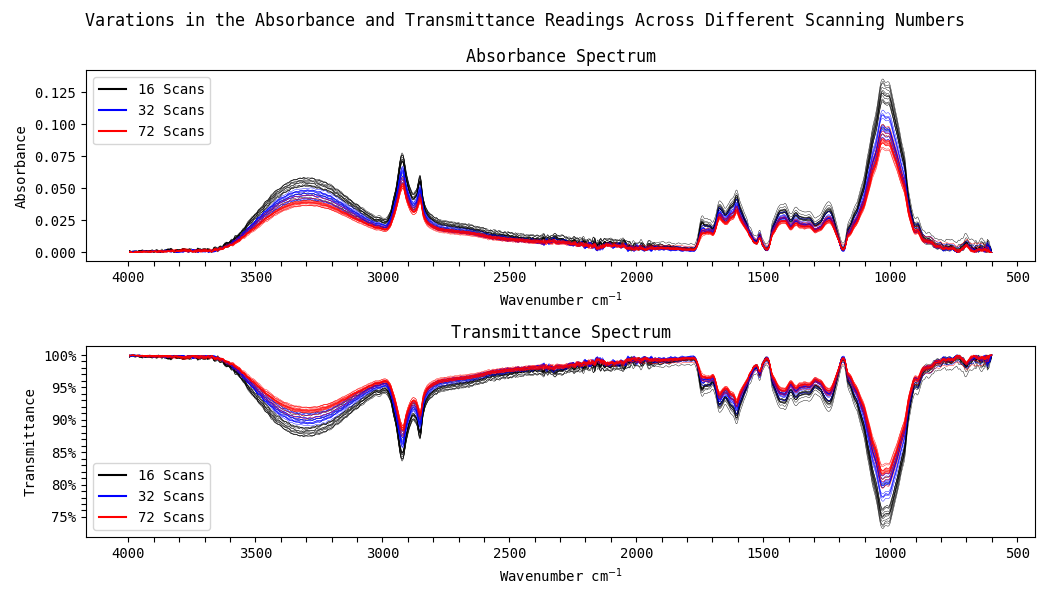

In [6]:
#General Comparison between Scanning Nos. 16,32 and 72

#fig init
fig3, (abs_comp, trans_comp) = plt.subplots(2,1, figsize=(10.5,6))
fig3.canvas.header_visible = False
fig3.suptitle('Varations in the Absorbance and Transmittance Readings Across Different Scanning Numbers')
wave_no_x = scan_16['wave_no']

#Absorbance Comparison
#ticks and tick labels
abs_comp_xticks = [tick for tick in range(500,4100,100)]
abs_comp.set(title='Absorbance Spectrum',
             xticks=abs_comp_xticks,
             xticklabels=[tick if tick in range(500,4500,500) else '' for tick in abs_comp_xticks],
             xlabel='Wavenumber cm$^{-1}$',
             ylabel='Absorbance')

#Transmittance Comparison
#ticks and labels
trans_comp_yticks=[tick for tick in range(75,101,1)]
trans_comp.set(title='Transmittance Spectrum',
               xticks=abs_comp_xticks, #same as abs_comp
               xticklabels=[tick if tick in range(500,4500,500) else '' for tick in abs_comp_xticks], #same as abs_comp
               yticks=[tick for tick in range(75,101,1)],
               yticklabels=[f'{tick}%' if tick in range(75,105,5) else '' for tick in trans_comp_yticks],
               xlabel='Wavenumber cm$^{-1}$',
               ylabel='Transmittance')

#main plot
abs_comp.invert_xaxis()
trans_comp.invert_xaxis()

for trial in scan_16.columns[1:]:
    abs_comp.plot(wave_no_x, scan_16[trial],
                  color='black',
                  linewidth=0.3)
    trans_comp.plot(wave_no_x, (10**-scan_16[trial]*100),
                  color='black',
                  linewidth=0.3)

for trial in scan_32.columns[1:]:
    abs_comp.plot(wave_no_x, scan_32[trial],
                  color='blue',
                  linewidth=0.3)
    trans_comp.plot(wave_no_x, (10**-scan_32[trial]*100),
                    color='blue',
                    linewidth=0.3)
    
for trial in scan_72.columns[1:]:
    abs_comp.plot(wave_no_x, scan_72[trial],
                  color='red',
                  linewidth=0.3)
    trans_comp.plot(wave_no_x, (10**-scan_72[trial]*100),
                    color='red',
                    linewidth=0.3)
    
#labels
for color,label in zip(['black','blue','red'], ['16 Scans','32 Scans','72 Scans']):
    abs_comp.plot([], [], label=label, color=color)
    trans_comp.plot([], [], label=label, color=color)
    
abs_comp.legend(loc='upper left')
trans_comp.legend(loc='lower left')

fig3.tight_layout()

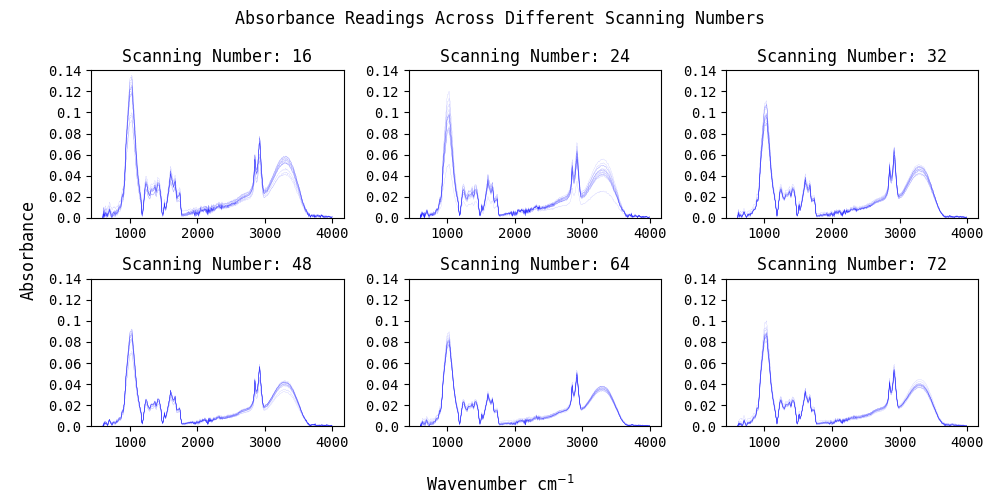

In [7]:
#Plotting All Scanning Numbers Spectra

#fig init
fig4, axes = plt.subplots(2,3, figsize=[10,5])

fig4.canvas.header_visible = False
fig4.suptitle('Absorbance Readings Across Different Scanning Numbers')
fig4.supxlabel('Wavenumber cm$^{-1}$')
fig4.supylabel('Absorbance')

#organizing data
wave_no_x = scan_16['wave_no']
pooled_df = [scan_16, scan_24, scan_32,
             scan_48, scan_64, scan_72]
sn = [16,24,32,48,64,72]

for index, (axis, df) in enumerate(zip(axes.flat, pooled_df)):
    for trial in df.columns[1:]:
        axis.plot(wave_no_x, df[trial],
                  color='blue',
                  linewidth=0.05)
    axis.set(title=f'Scanning Number: {sn[index]}',
             yticks=[tick for tick in np.arange(0, 0.160, 0.020)],
             yticklabels=[tick for tick in np.arange(0, 0.160, 0.020)],
             ylim=[0,0.140])

fig4.tight_layout()

<center><b><h2>Optimization Approach: Area Under the Curve</h2></b></center>
<center><a href="https://www.intmath.com/integration/6-simpsons-rule.php">Simpson's Rule</a><center>

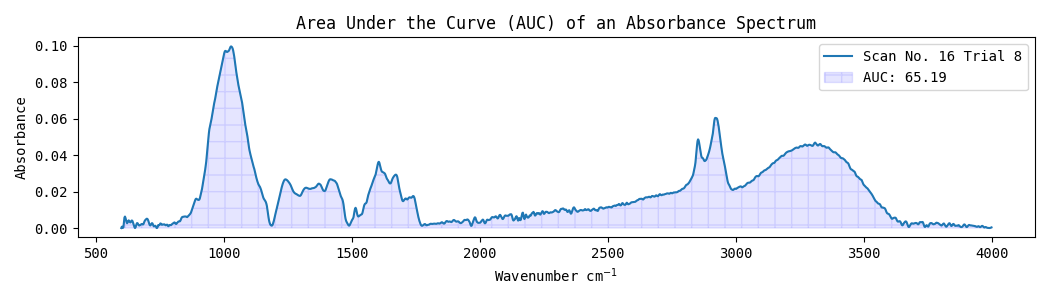

In [8]:
#Visualization of Spectral AUC via Simpson's Rule

#fig init
fig5, auc_spec = plt.subplots(1,1, figsize=(10.5,3))
fig5.canvas.header_visible = False
wave_no_x = scan_16['wave_no']

#auc computation
random_trial = random.choice(scan_16.columns[1:]) #gets random trial from scanning no. 16 (most varied)
auc_comp = integrate.simpson(np.flip(scan_16[random_trial]),x=np.flip(wave_no_x)) #data needs to be increasing to integrate hence the flip

#main plot
auc_spec.plot(wave_no_x, scan_16[random_trial],
              label=f'Scan No. 16 Trial {random_trial.replace("trial_","")}')
#auc fill
auc_spec.fill_between(wave_no_x, scan_16[random_trial], 0,
                      color='blue',
                      hatch='+',
                      alpha=0.1,
                      label = f'AUC: {round(auc_comp,2)}')

#labels and legends
auc_spec.set(title='Area Under the Curve (AUC) of an Absorbance Spectrum',
             xlabel='Wavenumber cm$^{-1}$',
             ylabel='Absorbance')
auc_spec.legend(loc='upper right')

fig5.tight_layout()